<a href="https://colab.research.google.com/github/sumaj007/BDA-_ICP5/blob/main/BDA_ICP5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IRIS

In [26]:
from google.colab import files
import pandas as pd

# Upload the CSV file
uploaded = files.upload()

# Load it using pandas
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Preview the dataset
df.head()


Saving Iris.csv to Iris (5).csv


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
# Show all column names
print("Columns in dataset:", df.columns.tolist())

# For Iris.csv, we drop 'Id' and use 'Species' as the target
X = df.drop(["Id", "Species"], axis=1)
y = df["Species"]


Columns in dataset: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

models = {
    'RandomForest': (RandomForestClassifier(), {
        'pca__n_components': [2, 3, None],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 5, 10]
    }),
    'LogisticRegression': (LogisticRegression(max_iter=500), {
        'pca__n_components': [2, 3, None],
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__solver': ['liblinear', 'lbfgs']
    }),
    'Perceptron': (Perceptron(), {
        'pca__n_components': [2, 3, None],
        'classifier__penalty': [None, 'l2', 'l1', 'elasticnet'],
        'classifier__alpha': [0.0001, 0.001, 0.01]
    }),
    'KNN': (KNeighborsClassifier(), {
        'pca__n_components': [2, 3, None],
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance']
    })
}


 3 fold, 5 fold and 7 fold cross validation

In [51]:
folds = [3, 5, 7]

for model_name, (model, param_grid) in models.items():
    print(f"\n🔍 Model: {model_name}")

    for fold in folds:
        print(f"\n--- Using {fold}-Fold Cross Validation ---")

        pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('pca', PCA()),
            ('classifier', model)
        ])

        search = RandomizedSearchCV(
            estimator=pipe,
            param_distributions=param_grid,
            n_iter=10,
            cv=StratifiedKFold(n_splits=fold, shuffle=True, random_state=42),
            random_state=42,
            n_jobs=-1
        )

        search.fit(X_train, y_train)

        print("✅ Best Parameters:", search.best_params_)
        print("📊 Best CV Score: {:.2f}".format(search.best_score_))
        print("🧪 Test Set Accuracy: {:.2f}".format(search.score(X_test, y_test)))



🔍 Model: RandomForest

--- Using 3-Fold Cross Validation ---
✅ Best Parameters: {'pca__n_components': 3, 'classifier__n_estimators': 100, 'classifier__max_depth': 5}
📊 Best CV Score: 0.80
🧪 Test Set Accuracy: 0.80

--- Using 5-Fold Cross Validation ---
✅ Best Parameters: {'pca__n_components': 3, 'classifier__n_estimators': 100, 'classifier__max_depth': 5}
📊 Best CV Score: 0.80
🧪 Test Set Accuracy: 0.80

--- Using 7-Fold Cross Validation ---
✅ Best Parameters: {'pca__n_components': 2, 'classifier__n_estimators': 50, 'classifier__max_depth': 5}
📊 Best CV Score: 0.79
🧪 Test Set Accuracy: 0.79

🔍 Model: LogisticRegression

--- Using 3-Fold Cross Validation ---
✅ Best Parameters: {'pca__n_components': None, 'classifier__solver': 'lbfgs', 'classifier__C': 0.01}
📊 Best CV Score: 0.86
🧪 Test Set Accuracy: 0.83

--- Using 5-Fold Cross Validation ---
✅ Best Parameters: {'pca__n_components': None, 'classifier__solver': 'lbfgs', 'classifier__C': 0.01}
📊 Best CV Score: 0.86
🧪 Test Set Accuracy: 0.

GRID SERACH

Saving Iris.csv to Iris (7).csv

🔍 Model: RandomForest

--- Using 3-Fold GridSearchCV ---
✅ Best Parameters: {'classifier__max_depth': 5, 'classifier__n_estimators': 100, 'pca__n_components': 3}
📊 Best CV Score: 0.93
🧪 Test Set Accuracy: 1.00


<Figure size 600x400 with 0 Axes>

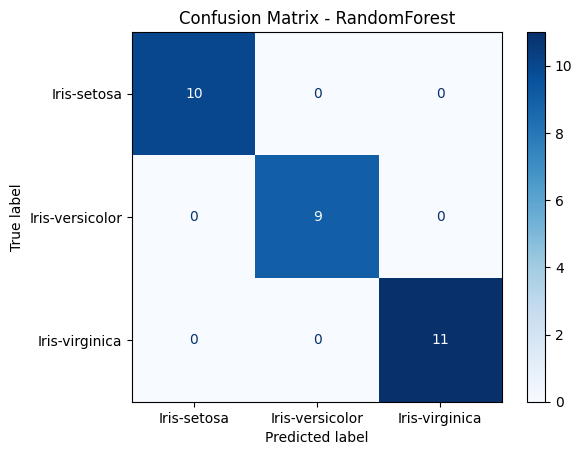

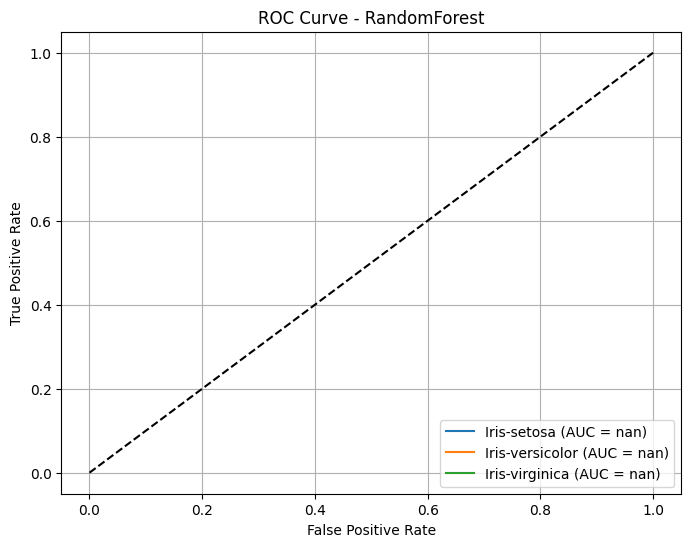


🔍 Model: LogisticRegression

--- Using 3-Fold GridSearchCV ---
✅ Best Parameters: {'classifier__C': 10, 'classifier__solver': 'lbfgs', 'pca__n_components': 3}
📊 Best CV Score: 0.94
🧪 Test Set Accuracy: 1.00


<Figure size 600x400 with 0 Axes>

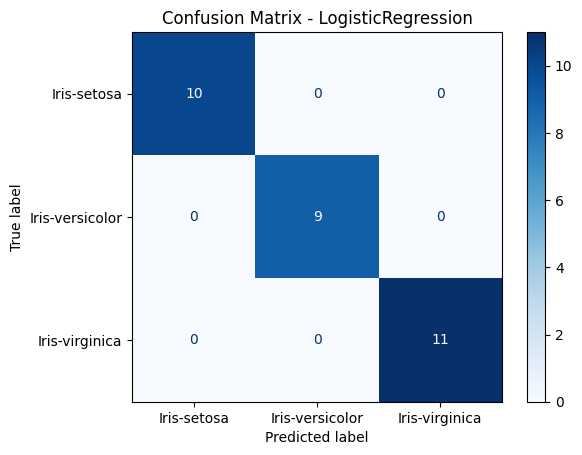

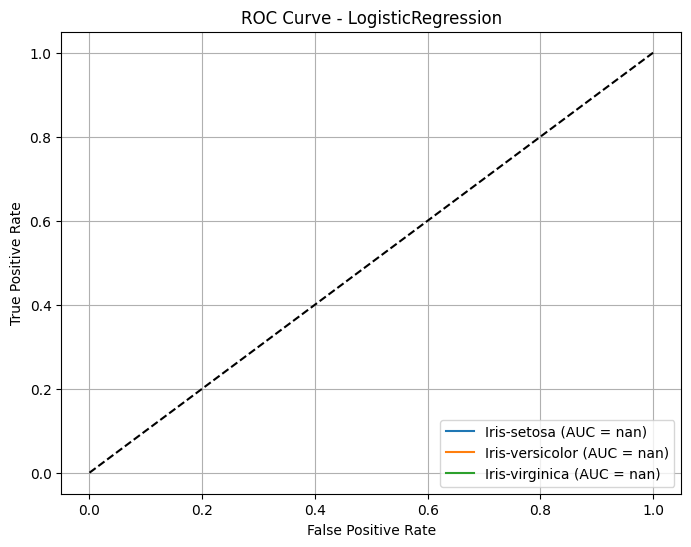


🔍 Model: KNN

--- Using 3-Fold GridSearchCV ---
✅ Best Parameters: {'classifier__n_neighbors': 5, 'classifier__weights': 'uniform', 'pca__n_components': 3}
📊 Best CV Score: 0.96
🧪 Test Set Accuracy: 1.00


<Figure size 600x400 with 0 Axes>

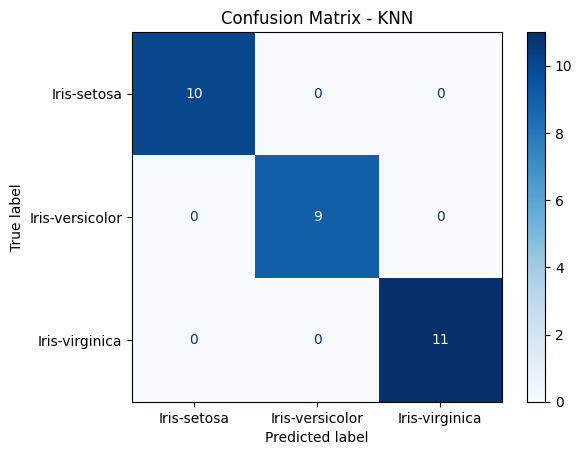

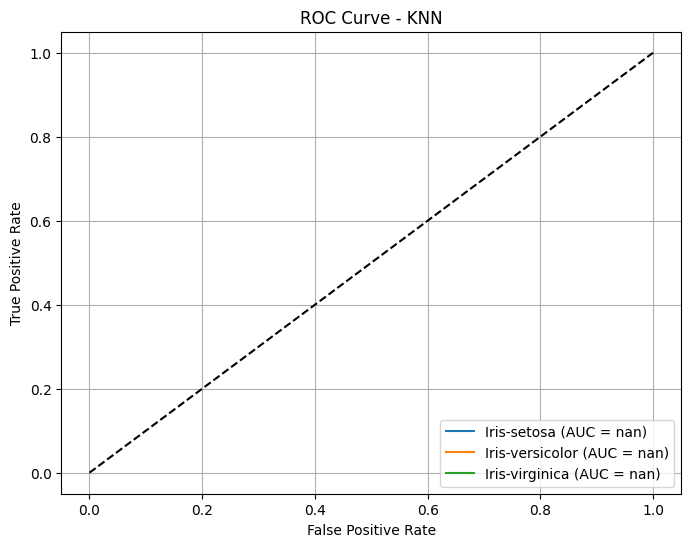

In [53]:
# Step 1: Upload and load Iris.csv
from google.colab import files
import pandas as pd

uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Step 2: Preprocess
X = df.drop(['Id', 'Species'], axis=1)
y = df['Species']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_names = le.classes_

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 3: Import everything
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Step 4: Define models and grids
models = {
    'RandomForest': (RandomForestClassifier(), {
        'pca__n_components': [2, 3],
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [None, 5, 10]
    }),
    'LogisticRegression': (LogisticRegression(max_iter=500, multi_class='ovr'), {
        'pca__n_components': [2, 3],
        'classifier__C': [0.1, 1, 10],
        'classifier__solver': ['liblinear', 'lbfgs']
    }),
    'KNN': (KNeighborsClassifier(), {
        'pca__n_components': [2, 3],
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance']
    })
}

folds = [3]  # You can also try [3, 5, 7]

for model_name, (model, param_grid) in models.items():
    print(f"\n🔍 Model: {model_name}")

    for fold in folds:
        print(f"\n--- Using {fold}-Fold GridSearchCV ---")

        pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('pca', PCA()),
            ('classifier', model)
        ])

        search = GridSearchCV(
            estimator=pipe,
            param_grid=param_grid,
            cv=StratifiedKFold(n_splits=fold, shuffle=True, random_state=42),
            n_jobs=-1
        )

        search.fit(X_train, y_train)

        print("✅ Best Parameters:", search.best_params_)
        print("📊 Best CV Score: {:.2f}".format(search.best_score_))
        print("🧪 Test Set Accuracy: {:.2f}".format(search.score(X_test, y_test)))

        # Confusion Matrix
        y_pred = search.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
        plt.figure(figsize=(6, 4))
        disp.plot(cmap='Blues')
        plt.title(f"Confusion Matrix - {model_name}")
        plt.show()

        # ROC Curve (if supported)
        if hasattr(search.best_estimator_['classifier'], "predict_proba"):
            y_score = search.predict_proba(X_test)
            y_test_bin = label_binarize(y_test, classes=np.unique(y))

            fpr = dict()
            tpr = dict()
            roc_auc = dict()

            for i in range(y_score.shape[1]):
                fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
                roc_auc[i] = auc(fpr[i], tpr[i])

            plt.figure(figsize=(8, 6))
            for i in range(y_score.shape[1]):
                plt.plot(fpr[i], tpr[i], label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})")

            plt.plot([0, 1], [0, 1], 'k--')
            plt.title(f"ROC Curve - {model_name}")
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.legend(loc="lower right")
            plt.grid(True)
            plt.show()


Also replace Gridsearch with randomnsearch function.

Saving Iris.csv to Iris (6).csv

🔍 Model: RandomForest

--- Using 3-Fold Cross Validation ---
✅ Best Parameters: {'pca__n_components': 3, 'classifier__n_estimators': 100, 'classifier__max_depth': None}
📊 Best CV Score: 0.94
🧪 Test Set Accuracy: 1.00


<Figure size 600x400 with 0 Axes>

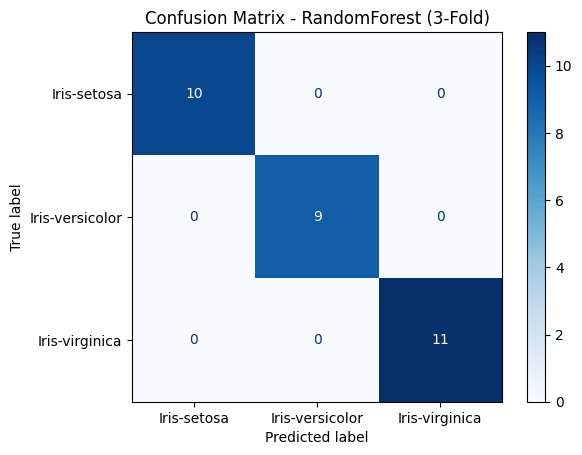

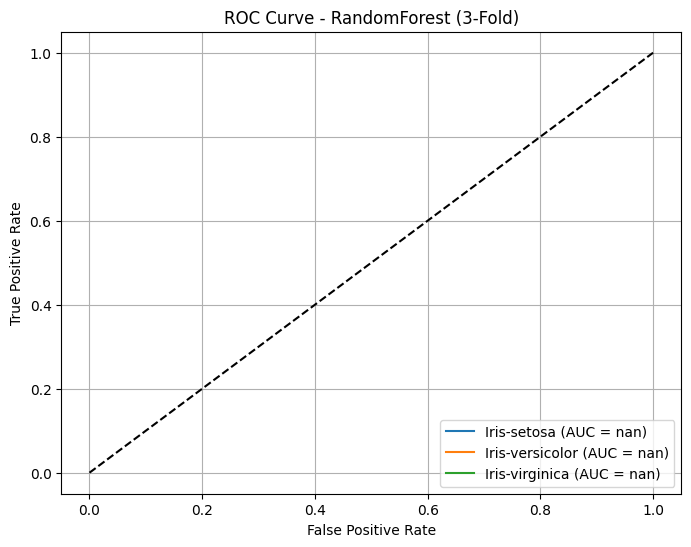


--- Using 5-Fold Cross Validation ---
✅ Best Parameters: {'pca__n_components': 3, 'classifier__n_estimators': 50, 'classifier__max_depth': None}
📊 Best CV Score: 0.92
🧪 Test Set Accuracy: 1.00


<Figure size 600x400 with 0 Axes>

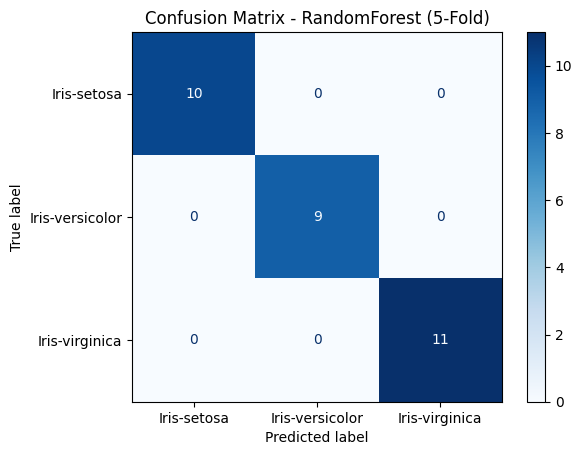

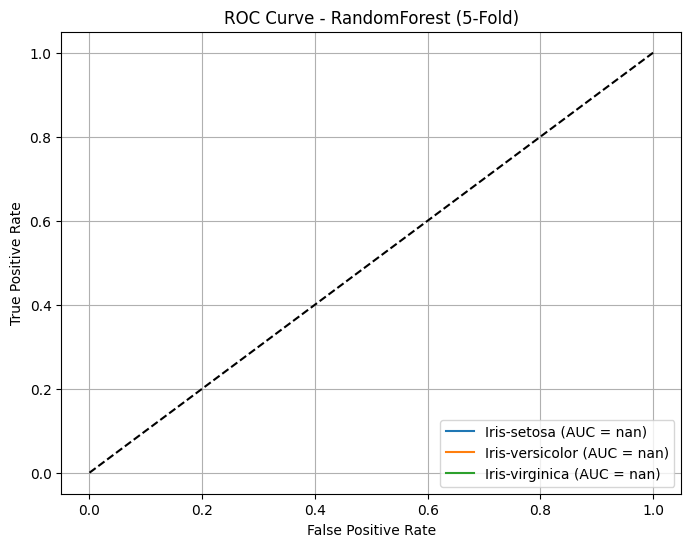


--- Using 7-Fold Cross Validation ---
✅ Best Parameters: {'pca__n_components': 3, 'classifier__n_estimators': 50, 'classifier__max_depth': 10}
📊 Best CV Score: 0.93
🧪 Test Set Accuracy: 1.00


<Figure size 600x400 with 0 Axes>

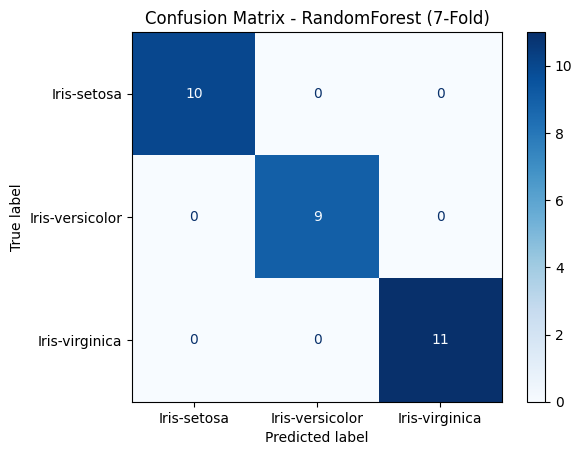

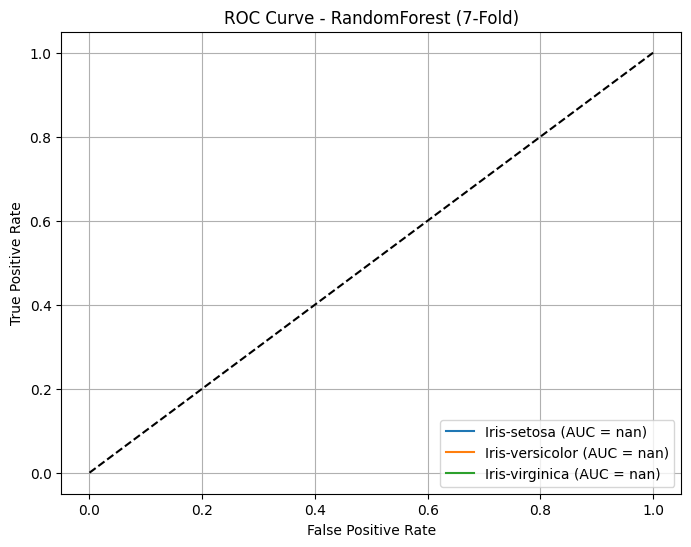


🔍 Model: LogisticRegression

--- Using 3-Fold Cross Validation ---
✅ Best Parameters: {'pca__n_components': 3, 'classifier__solver': 'lbfgs', 'classifier__C': 10}
📊 Best CV Score: 0.94
🧪 Test Set Accuracy: 1.00


<Figure size 600x400 with 0 Axes>

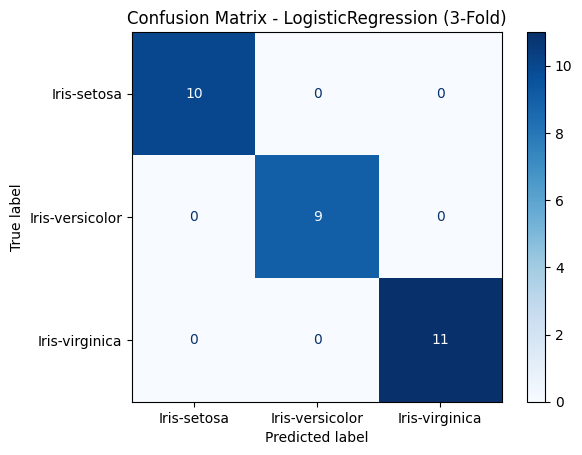

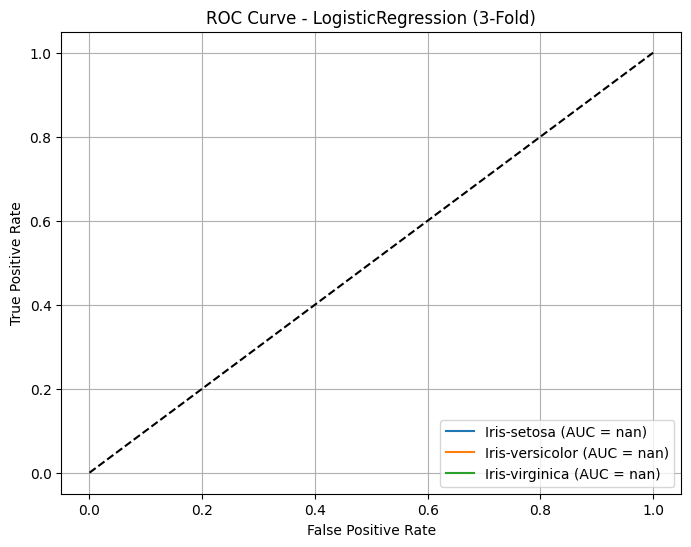


--- Using 5-Fold Cross Validation ---
✅ Best Parameters: {'pca__n_components': 3, 'classifier__solver': 'lbfgs', 'classifier__C': 10}
📊 Best CV Score: 0.93
🧪 Test Set Accuracy: 1.00


<Figure size 600x400 with 0 Axes>

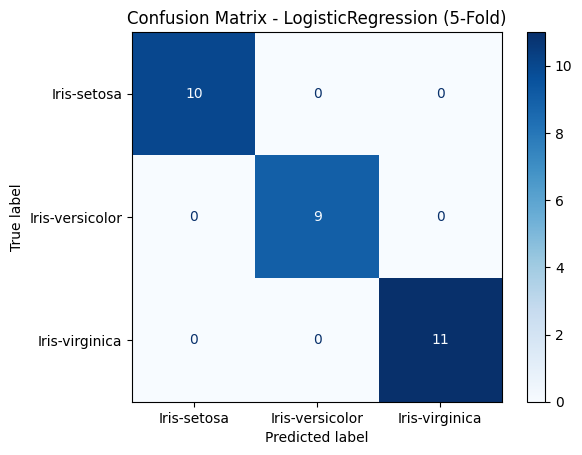

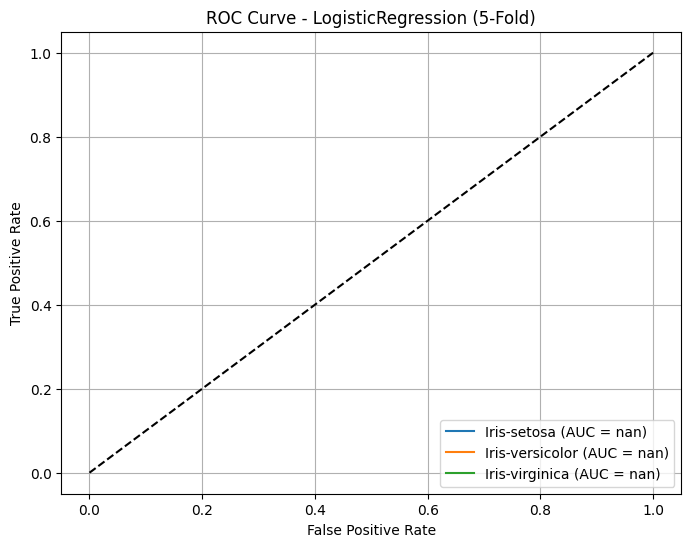


--- Using 7-Fold Cross Validation ---
✅ Best Parameters: {'pca__n_components': 3, 'classifier__solver': 'liblinear', 'classifier__C': 10}
📊 Best CV Score: 0.94
🧪 Test Set Accuracy: 1.00


<Figure size 600x400 with 0 Axes>

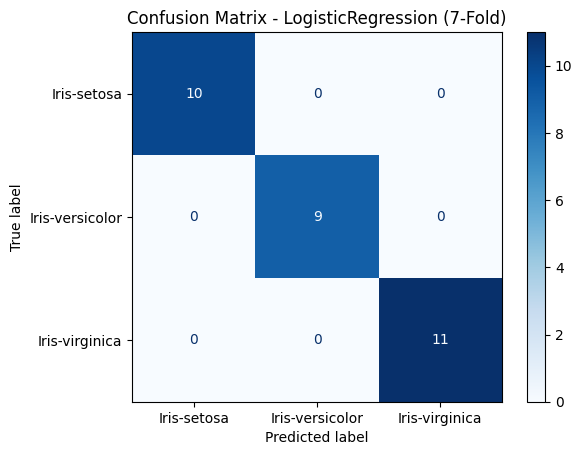

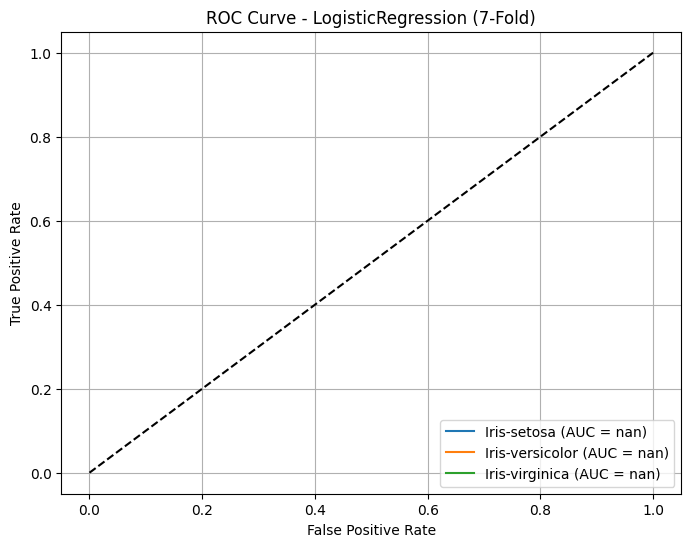


🔍 Model: KNN

--- Using 3-Fold Cross Validation ---
✅ Best Parameters: {'pca__n_components': 3, 'classifier__weights': 'uniform', 'classifier__n_neighbors': 7}
📊 Best CV Score: 0.96
🧪 Test Set Accuracy: 1.00


<Figure size 600x400 with 0 Axes>

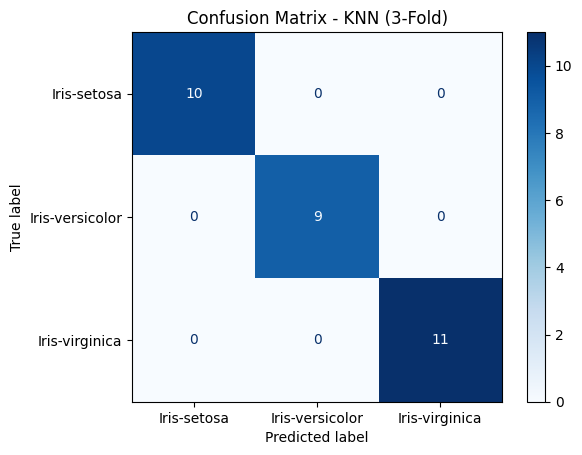

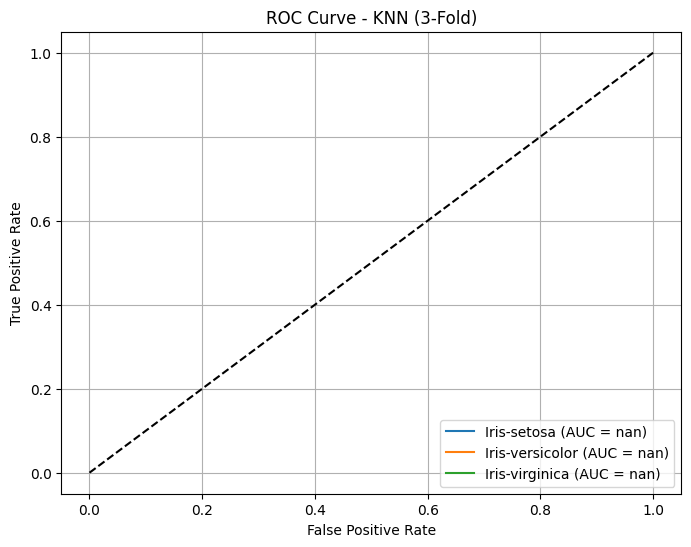


--- Using 5-Fold Cross Validation ---
✅ Best Parameters: {'pca__n_components': 3, 'classifier__weights': 'uniform', 'classifier__n_neighbors': 7}
📊 Best CV Score: 0.97
🧪 Test Set Accuracy: 1.00


<Figure size 600x400 with 0 Axes>

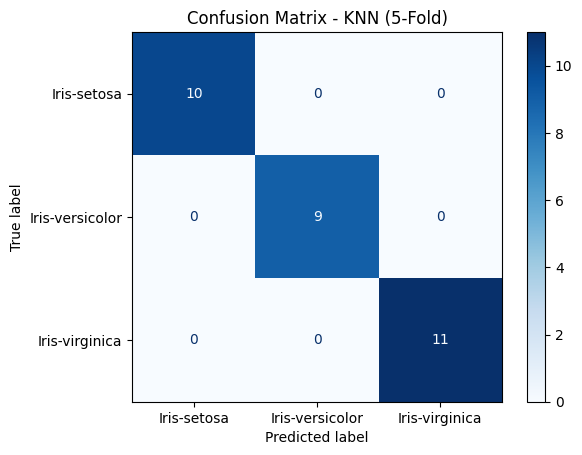

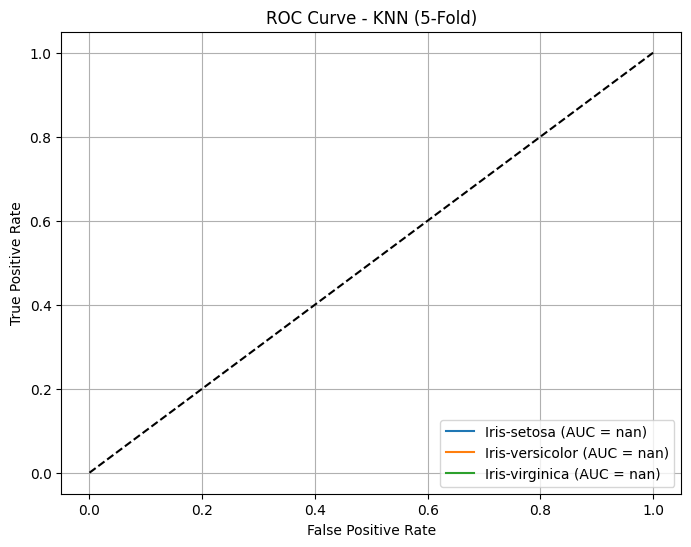


--- Using 7-Fold Cross Validation ---
✅ Best Parameters: {'pca__n_components': 3, 'classifier__weights': 'uniform', 'classifier__n_neighbors': 7}
📊 Best CV Score: 0.97
🧪 Test Set Accuracy: 1.00


<Figure size 600x400 with 0 Axes>

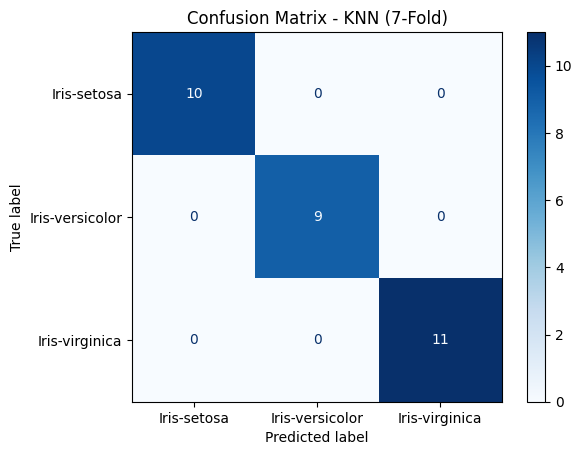

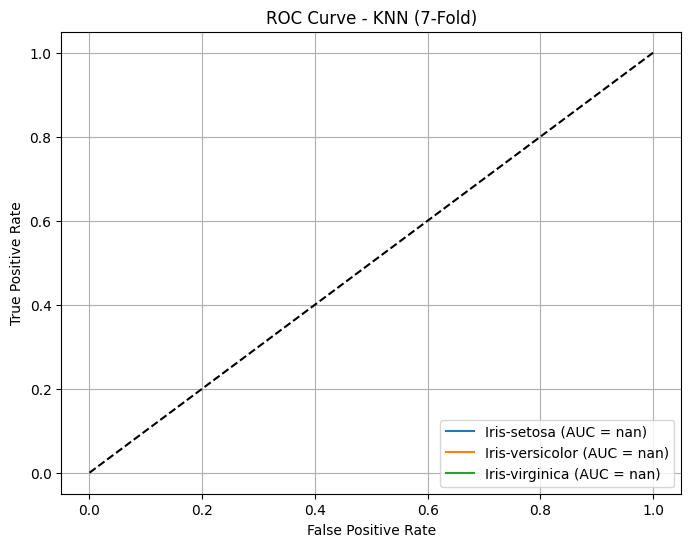

In [52]:
# STEP 1: Upload the Iris.csv
from google.colab import files
import pandas as pd

uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# STEP 2: Prepare features and target
X = df.drop(['Id', 'Species'], axis=1)
y = df['Species']

# Encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_names = le.classes_

# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# STEP 3: Imports
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# STEP 4: Define classifiers and hyperparameters
models = {
    'RandomForest': (RandomForestClassifier(), {
        'pca__n_components': [2, 3],
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 5, 10]
    }),
    'LogisticRegression': (LogisticRegression(max_iter=500, multi_class='ovr'), {
        'pca__n_components': [2, 3],
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__solver': ['liblinear', 'lbfgs']
    }),
    'KNN': (KNeighborsClassifier(), {
        'pca__n_components': [2, 3],
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance']
    })
}

# STEP 5: Loop through models using RandomizedSearchCV
folds = [3, 5, 7]

for model_name, (model, param_grid) in models.items():
    print(f"\n🔍 Model: {model_name}")

    for fold in folds:
        print(f"\n--- Using {fold}-Fold Cross Validation ---")

        pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('pca', PCA()),
            ('classifier', model)
        ])

        search = RandomizedSearchCV(
            estimator=pipe,
            param_distributions=param_grid,
            n_iter=10,
            cv=StratifiedKFold(n_splits=fold, shuffle=True, random_state=42),
            random_state=42,
            n_jobs=-1
        )

        search.fit(X_train, y_train)

        print("✅ Best Parameters:", search.best_params_)
        print("📊 Best CV Score: {:.2f}".format(search.best_score_))
        print("🧪 Test Set Accuracy: {:.2f}".format(search.score(X_test, y_test)))

        # Predict
        y_pred = search.predict(X_test)

        # CONFUSION MATRIX
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
        plt.figure(figsize=(6, 4))
        disp.plot(cmap='Blues')
        plt.title(f"Confusion Matrix - {model_name} ({fold}-Fold)")
        plt.show()

        # ROC CURVE (Only if classifier supports predict_proba)
        if hasattr(search.best_estimator_['classifier'], "predict_proba"):
            y_score = search.predict_proba(X_test)

            # Handle binary vs multiclass ROC
            y_test_bin = label_binarize(y_test, classes=np.unique(y))
            fpr = dict()
            tpr = dict()
            roc_auc = dict()

            for i in range(y_score.shape[1]):
                fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
                roc_auc[i] = auc(fpr[i], tpr[i])

            plt.figure(figsize=(8, 6))
            for i in range(y_score.shape[1]):
                plt.plot(fpr[i], tpr[i], label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})")

            plt.plot([0, 1], [0, 1], 'k--')
            plt.title(f"ROC Curve - {model_name} ({fold}-Fold)")
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.legend(loc="lower right")
            plt.grid(True)
            plt.show()


In [31]:
from google.colab import files
uploaded = files.upload()


Saving pd_speech_features.csv to pd_speech_features (3).csv


3;5;7 FOLDING

In [33]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

# Load your dataset
data = pd.read_csv("pd_speech_features.csv")

# Replace "class" with your actual target column if different
X = data.drop("class", axis=1)
y = data["class"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models and parameter grids
models = {
    "RandomForest": (RandomForestClassifier(), {
        'pca__n_components': [5, 10],
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [None, 10]
    }),
    "LogisticRegression": (LogisticRegression(max_iter=1000), {
        'pca__n_components': [5, 10],
        'classifier__C': [0.1, 1],
        'classifier__penalty': ['l2']
    }),
    "Perceptron": (Perceptron(), {
        'pca__n_components': [5, 10],
        'classifier__penalty': ['l2', None],
        'classifier__alpha': [0.0001, 0.001]
    }),
    "KNN": (KNeighborsClassifier(), {
        'pca__n_components': [5, 10],
        'classifier__n_neighbors': [3, 5],
        'classifier__weights': ['uniform', 'distance']
    }),
}

# Use 3, 5, 7 fold CV
folds = [3, 5, 7]

for model_name, (model, param_grid) in models.items():
    print(f"\n📌 Model: {model_name}")
    for fold in folds:
        print(f"➡️  Fold: {fold}")

        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('pca', PCA()),
            ('classifier', model)
        ])

        grid = GridSearchCV(pipeline, param_grid=param_grid, cv=StratifiedKFold(n_splits=fold, shuffle=True, random_state=42), n_jobs=-1)
        grid.fit(X_train, y_train)

        y_pred = grid.predict(X_test)
        y_proba = grid.predict_proba(X_test)[:, 1] if hasattr(grid, "predict_proba") else None

        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        auc = roc_auc_score(y_test, y_proba, multi_class='ovo') if y_proba is not None and len(set(y)) > 2 else 'N/A'

        print("  ✅ Best Parameters:", grid.best_params_)
        print("  🔹 CV Score: {:.2f}".format(grid.best_score_))
        print("  🔹 Test Accuracy: {:.2f}".format(acc))
        print("  🔹 F1 Score: {:.2f}".format(f1))
        print("  🔹 ROC-AUC Score:", auc)
        print("  🔍 Classification Report:\n", classification_report(y_test, y_pred))



📌 Model: RandomForest
➡️  Fold: 3
  ✅ Best Parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 50, 'pca__n_components': 10}
  🔹 CV Score: 0.84
  🔹 Test Accuracy: 0.86
  🔹 F1 Score: 0.85
  🔹 ROC-AUC Score: N/A
  🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.58      0.68        38
           1       0.87      0.96      0.91       114

    accuracy                           0.86       152
   macro avg       0.84      0.77      0.79       152
weighted avg       0.86      0.86      0.85       152

➡️  Fold: 5
  ✅ Best Parameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 100, 'pca__n_components': 10}
  🔹 CV Score: 0.84
  🔹 Test Accuracy: 0.84
  🔹 F1 Score: 0.83
  🔹 ROC-AUC Score: N/A
  🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.53      0.62        38
           1       0.86      0.95      0.90       114

    accuracy     

GRID SEARCH

✅ Best Parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 50, 'pca__n_components': 10}
✅ Test Accuracy: 0.83


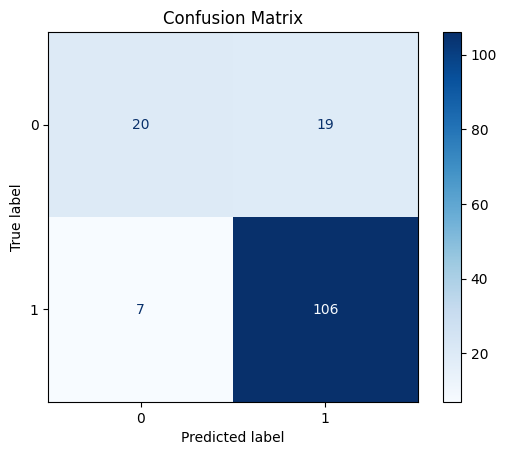

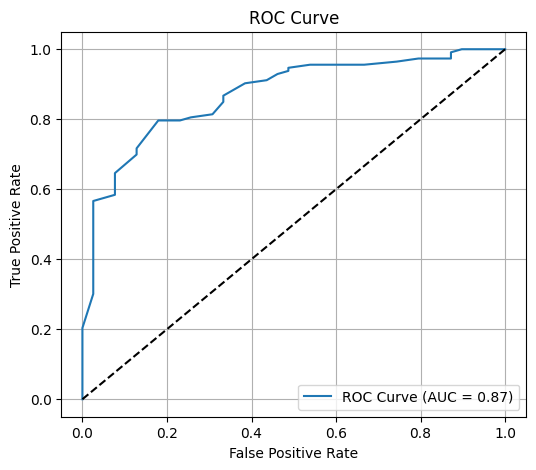

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Load dataset
df = pd.read_csv("/content/pd_speech_features.csv")  # Change path if needed
X = df.drop(columns=["class"])
y = df["class"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Create pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA()),
    ("classifier", RandomForestClassifier(random_state=42))
])

# Parameter grid for GridSearch
param_grid = {
    "pca__n_components": [5, 10, 15],
    "classifier__n_estimators": [50, 100],
    "classifier__max_depth": [None, 10, 20]
}

# Grid search
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid.fit(X_train, y_train)

# Best estimator
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Print results
print("✅ Best Parameters:", grid.best_params_)
print("✅ Test Accuracy: {:.2f}".format(best_model.score(X_test, y_test)))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


Also replace Gridsearch with randomnsearch function.

✅ Best Parameters: {'pca__n_components': 25, 'classifier__n_estimators': 100, 'classifier__min_samples_split': 5, 'classifier__max_depth': 10}
✅ Test Accuracy: 0.82


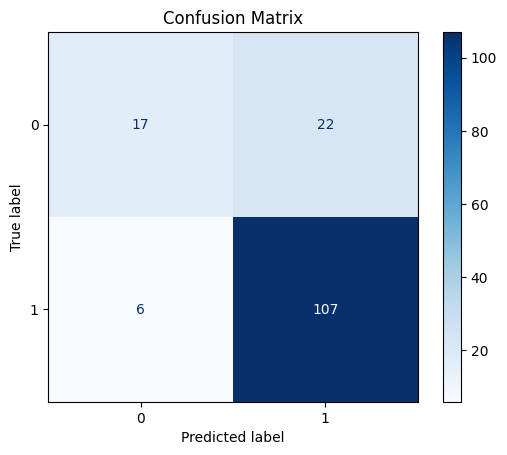

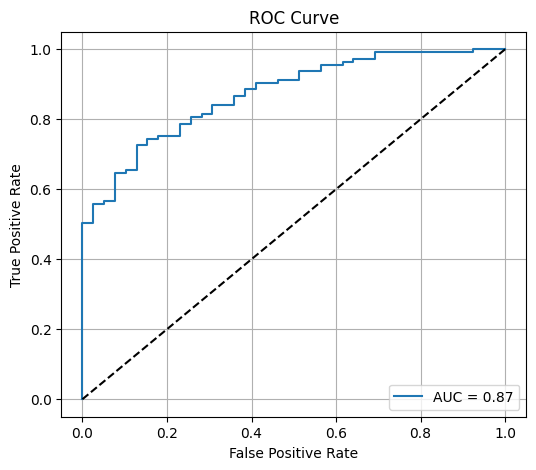

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import numpy as np

# 1. Load Dataset
df = pd.read_csv("/content/pd_speech_features.csv")  # Adjust path for Colab
X = df.drop(columns=["class"])
y = df["class"]

# 2. Train-test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 3. Pipeline
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA()),
    ("classifier", RandomForestClassifier(random_state=42))
])

# 4. RandomizedSearchCV Param Grid
param_dist = {
    "pca__n_components": list(range(5, 30, 5)),
    "classifier__n_estimators": [50, 100, 150],
    "classifier__max_depth": [None, 10, 20, 30],
    "classifier__min_samples_split": [2, 5, 10]
}

# 5. RandomizedSearchCV
search = RandomizedSearchCV(
    pipe, param_distributions=param_dist,
    n_iter=20, scoring="accuracy", cv=5,
    random_state=42, n_jobs=-1
)
search.fit(X_train, y_train)

# 6. Best Estimator and Predictions
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# 7. Metrics and Results
print("✅ Best Parameters:", search.best_params_)
print("✅ Test Accuracy: {:.2f}".format(best_model.score(X_test, y_test)))

# 8. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# 9. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [45]:
# STEP 1: Upload file
from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np

# STEP 2: Load dataset
df = pd.read_csv("CC GENERAL.csv")

# STEP 3: Drop ID and fill missing values
df = df.drop("CUST_ID", axis=1)
df = df.fillna(df.mean(numeric_only=True))

# STEP 4: Convert TENURE to binary target
X = df.drop("TENURE", axis=1)
y = (df["TENURE"] >= 12).astype(int)

# STEP 5: Imports
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

# STEP 6: Models and param grids
models = {
    "RandomForest": (RandomForestClassifier(), {
        'classifier__n_estimators': sp_randint(50, 150),
        'classifier__max_depth': sp_randint(3, 20)
    }),
    "LogisticRegression": (LogisticRegression(max_iter=500), {
        'classifier__C': uniform(0.01, 10),
        'classifier__penalty': ['l2']
    }),
    "Perceptron": (Perceptron(), {
        'classifier__penalty': ['l2', 'l1', None],
        'classifier__alpha': uniform(0.0001, 0.01)
    }),
    "KNN": (KNeighborsClassifier(), {
        'classifier__n_neighbors': sp_randint(3, 20),
        'classifier__weights': ['uniform', 'distance']
    })
}

# STEP 7: Loop through models and CV folds
folds = [3, 5, 7]

for model_name, (model, param_dist) in models.items():
    print(f"\n📌 Model: {model_name}")
    for fold in folds:
        print(f"➡️  Fold: {fold}")
        try:
            pipe = Pipeline([
                ('scaler', StandardScaler()),
                ('pca', PCA()),
                ('classifier', model)
            ])

            param_dist['pca__n_components'] = sp_randint(5, X.shape[1])

            rand = RandomizedSearchCV(pipe, param_distributions=param_dist,
                                      cv=StratifiedKFold(n_splits=fold, shuffle=True, random_state=42),
                                      n_iter=10, n_jobs=-1, random_state=42)

            X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
            rand.fit(X_train, y_train)
            y_pred = rand.predict(X_test)

            print("  ✅ Best Parameters:", rand.best_params_)
            print("  🔹 Test Accuracy: {:.2f}".format(rand.score(X_test, y_test)))
            print("  🔍 Classification Report:\n", classification_report(y_test, y_pred))
        except Exception as e:
            print(f"  ❌ Training failed: {e}")


Saving CC GENERAL.csv to CC GENERAL (9).csv

📌 Model: RandomForest
➡️  Fold: 3
  ✅ Best Parameters: {'classifier__max_depth': 9, 'classifier__n_estimators': 101, 'pca__n_components': 15}
  🔹 Test Accuracy: 0.87
  🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.20      0.32       273
           1       0.87      0.99      0.93      1517

    accuracy                           0.87      1790
   macro avg       0.85      0.60      0.63      1790
weighted avg       0.87      0.87      0.84      1790

➡️  Fold: 5
  ✅ Best Parameters: {'classifier__max_depth': 9, 'classifier__n_estimators': 101, 'pca__n_components': 15}
  🔹 Test Accuracy: 0.87
  🔍 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.18      0.30       273
           1       0.87      0.99      0.93      1517

    accuracy                           0.87      1790
   macro avg       0.87      0.59      0.61 

Also replace Gridsearch with randomnsearch function.

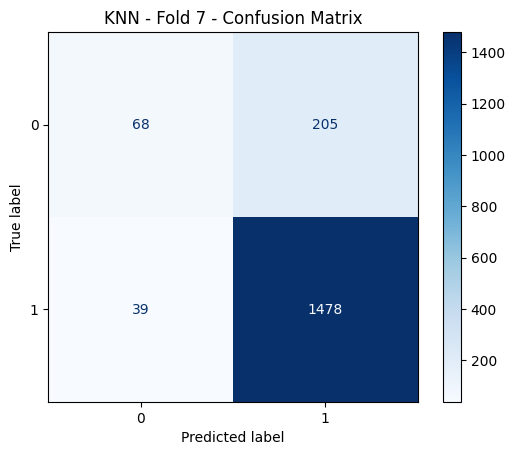

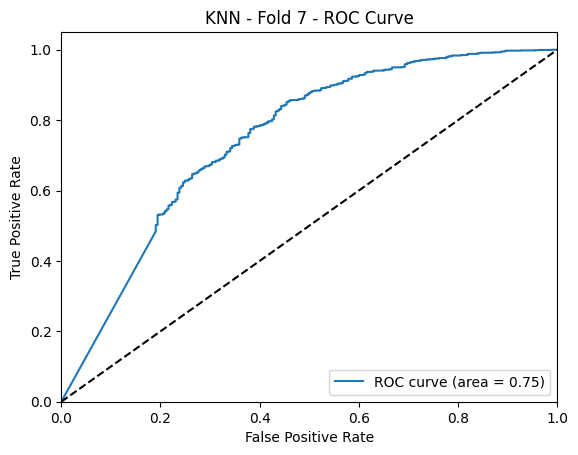

💾 Model saved as knn_fold7.joblib


In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
import joblib

# ... inside your for-loop after rand.fit()

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rand.classes_)
disp.plot(cmap='Blues')
plt.title(f"{model_name} - Fold {fold} - Confusion Matrix")
plt.show()

# ROC Curve (binary classification only)
if len(np.unique(y)) == 2:
    y_proba = rand.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"{model_name} - Fold {fold} - ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

# Save model
model_filename = f"{model_name.lower()}_fold{fold}.joblib"
joblib.dump(rand.best_estimator_, model_filename)
print(f"💾 Model saved as {model_filename}")
